In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

In [8]:
df = pd.read_csv('/Users/prasadaras/Desktop/TELECOM PROJECT/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [9]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [10]:
# Display the number of rows and columns
num_rows = df.shape[0]
num_columns = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 7043
Number of columns: 21


In [11]:
# Check data types of each column
column_types = df.dtypes

In [12]:
# Print the data types
print("Data types of each column:")
print(column_types)

Data types of each column:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [14]:
# Convert 'TotalCharges' to numeric 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
# Check for missing values
missing_values = df.isnull().sum()

In [16]:
# Print the missing values
print("Missing values:")
print(missing_values)

Missing values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [17]:
# Removing missing values 
df.dropna(inplace=True)

In [18]:
# Remove customer IDs from the data set
df2 = df.iloc[:, 1:]

In [19]:
# Converting the predictor variable to a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No', value=0, inplace=True)


In [20]:
# Convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [21]:
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Text(0.5, 1.0, 'Distribution of Customers by Gender')

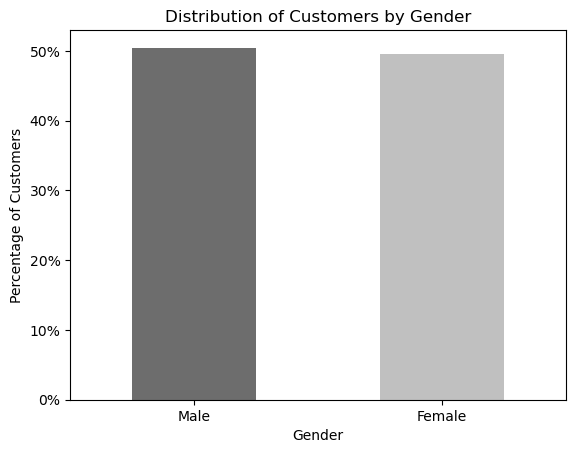

In [24]:
# gender distribution
ax = (df['gender'].value_counts() * 100.0 / len(df)).plot(kind='bar',
                                                         stacked=True,
                                                         rot=0,
                                                         color=['#6D6D6D', '#C0C0C0'])  
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Percentage of Customers')
ax.set_xlabel('Gender')
ax.set_title('Distribution of Customers by Gender')

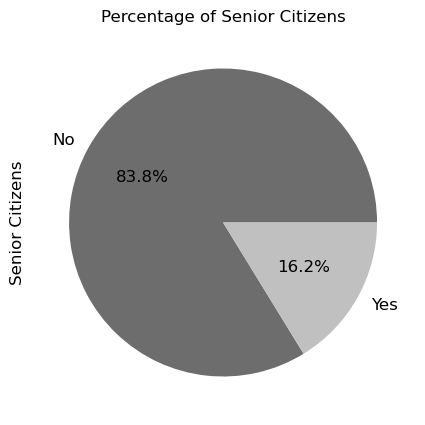

In [25]:
# senior citizen percentage
senior_citizen_percentage = df['SeniorCitizen'].value_counts() * 100.0 / len(df)
ax = senior_citizen_percentage.plot.pie(autopct='%.1f%%', labels=['No', 'Yes'], figsize=(5, 5), fontsize=12,
colors=['#6D6D6D', '#C0C0C0'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('Percentage of Senior Citizens', fontsize=12)
plt.show()


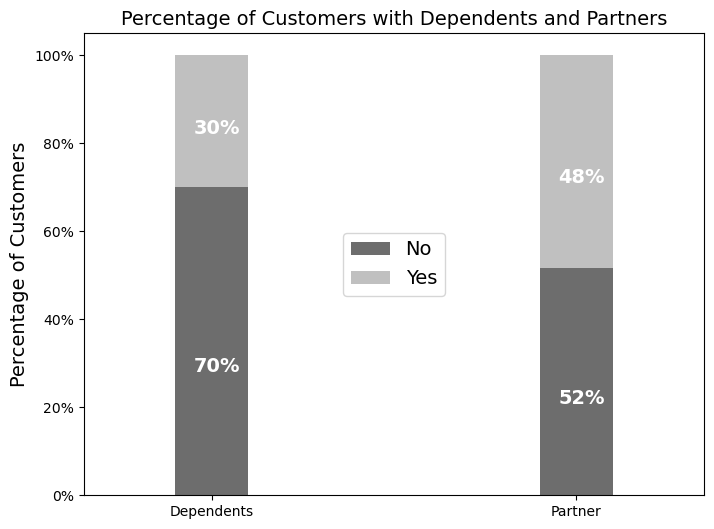

In [26]:
# customers with dependents and partners
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])
df3 = df2.groupby(['variable', 'value']).count().unstack()
df3 = df3 * 100 / len(df)
ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=['#6D6D6D', '#C0C0C0'],
                                       figsize=(8, 6), rot=0, width=0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Percentage of Customers', size=14)
ax.set_xlabel('')
ax.set_title('Percentage of Customers with Dependents and Partners', size=14)
ax.legend(loc='center', prop={'size': 14})
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white', weight='bold', size=14)
plt.show()

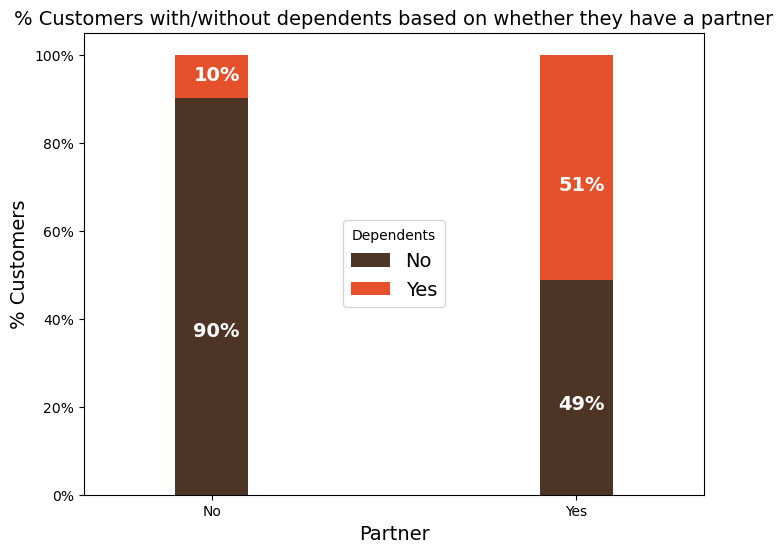

In [27]:
# customers with/without dependents based on whether they have a partner
partner_dependents = df.groupby(['Partner', 'Dependents']).size().unstack()
partner_dependents_percentage = (partner_dependents.T * 100.0 / partner_dependents.T.sum()).T
ax = partner_dependents_percentage.plot(kind='bar', width=0.2, stacked=True, rot=0, figsize=(8, 6),
                                        color=['#4D3425', '#E4512B'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size': 14}, title='Dependents', fontsize=14)
ax.set_ylabel('% Customers', size=14)
ax.set_title('% Customers with/without dependents based on whether they have a partner', size=14)
ax.xaxis.label.set_size(14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white', weight='bold', size=14)
plt.show()


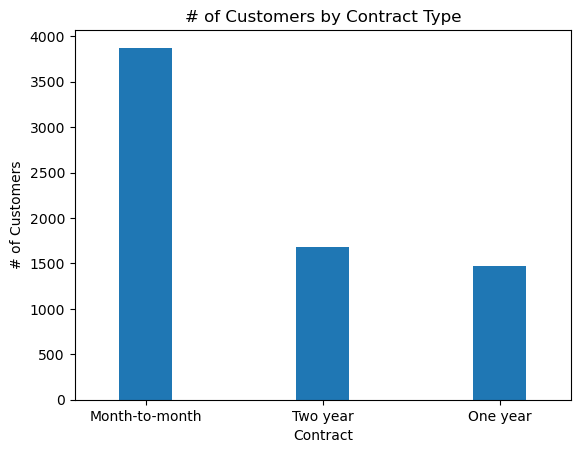

In [28]:
# bar plot for contract type distribution
df['Contract'].value_counts().plot(kind='bar', rot=0, width=0.3)
plt.ylabel('# of Customers')
plt.title('# of Customers by Contract Type')
plt.show()


/var/folders/_p/vcsnw8yx1c59pb1_3zb0lqy00000gn/T/ipykernel_8766/1141838883.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['tenure'], hist=True, kde=False,


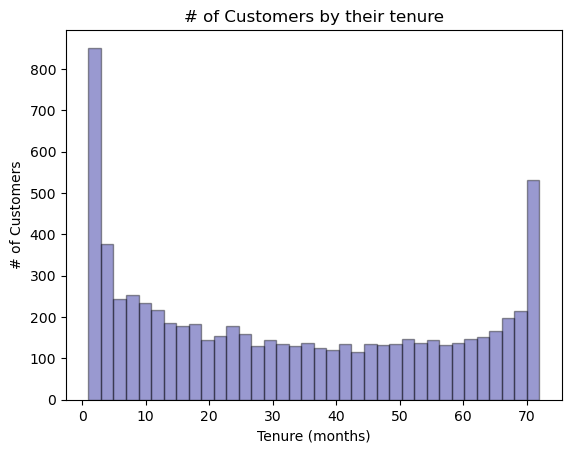

In [51]:
# distribution plot for tenure
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
                  bins=int(180/5), color='darkblue', 
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')
plt.show()

In [31]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Model Evaluation
predictions = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.46      0.52       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407

Confusion Matrix:
[[922 111]
 [202 172]]


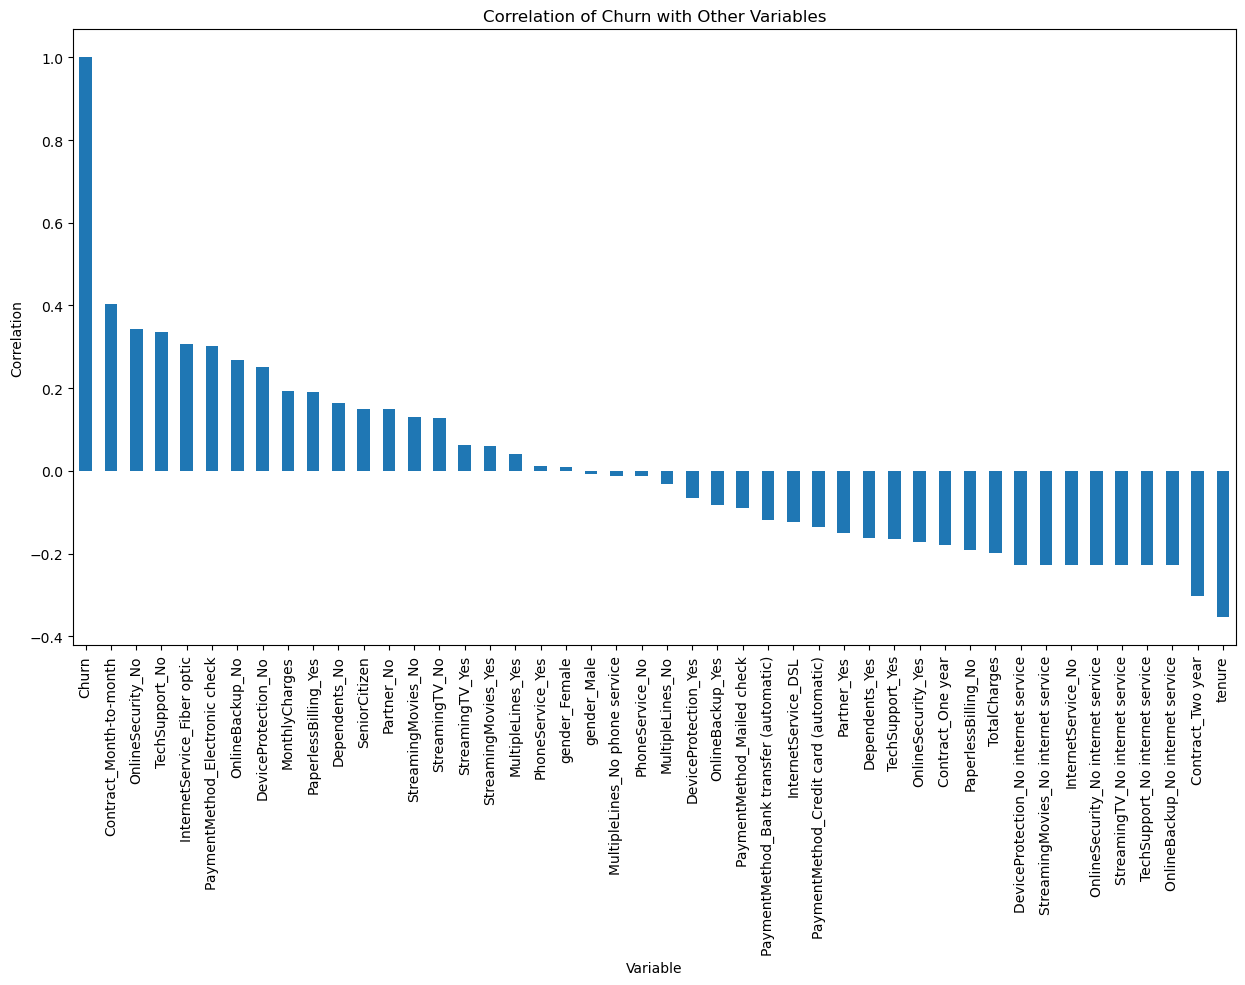

In [33]:
# Correlation of "Churn" with other variables
plt.figure(figsize=(15, 8))
df_dummies_corr = df_dummies.corr()['Churn'].sort_values(ascending=False)
df_dummies_corr.plot(kind='bar')
plt.title('Correlation of Churn with Other Variables')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()

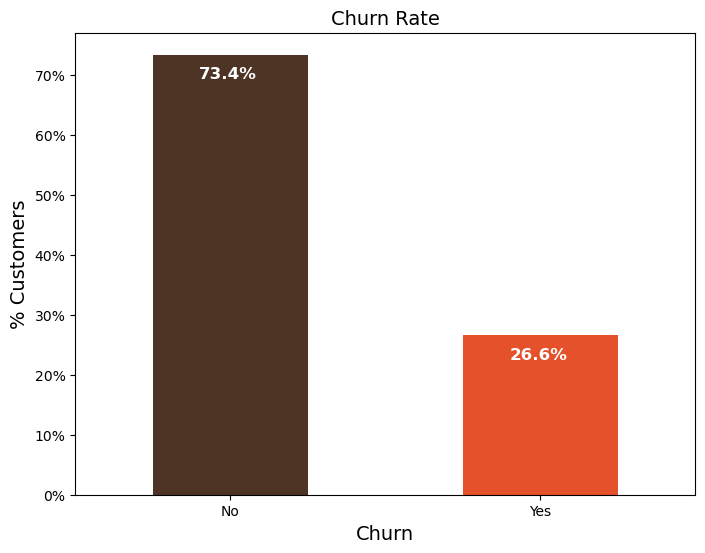

In [49]:
# Plot churn rate
ax = (df['Churn'].value_counts() * 100.0 / len(df)).plot(kind='bar',
                                                         stacked=True,
                                                         rot=0,
                                                         color=['#4D3425', '#E4512B'],
                                                         figsize=(8, 6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() + .15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,  # Remove 'size=14' or 'fontsize=12' here
            color='white',
            weight='bold')
plt.show()

In [35]:
# Group by churn and count occurrences for Bokeh plot
churn_counts = df['Churn'].value_counts()
churn_df = pd.DataFrame({'Churn': churn_counts.index, 'Count': churn_counts.values})
output_file("churn_distribution.html")
source = ColumnDataSource(churn_df)
colors = factor_cmap('Churn', palette=Spectral6, factors=churn_df['Churn'])
p = figure(x_range=churn_df['Churn'], height=350, title="Churn Distribution",
           toolbar_location=None, tools="")
p.vbar(x='Churn', top='Count', width=0.9, source=source, 
       line_color='white', fill_color=colors)
p.add_tools(HoverTool(tooltips=[("Churn", "@Churn"), ("Count", "@Count")]))
p.xaxis.axis_label = "Churn"
p.yaxis.axis_label = "Count"
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
show(p)

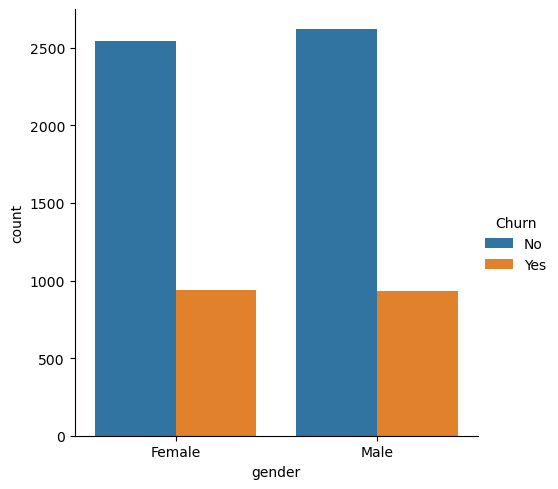

In [36]:
# catplot for gender distribution
sns.catplot(x="gender", kind="count", hue="Churn", data=df,
            estimator=lambda x: sum(x == 0) * 100.0 / len(x))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


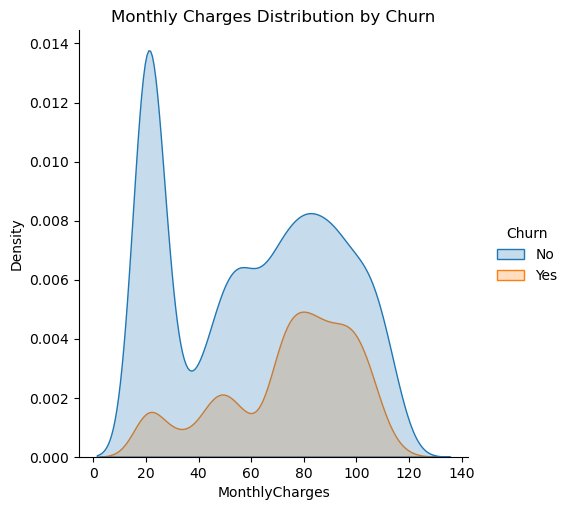

In [48]:
# Monthly Charges Distribution by Churn
sns.displot(df, x="MonthlyCharges", hue="Churn", kind="kde", fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


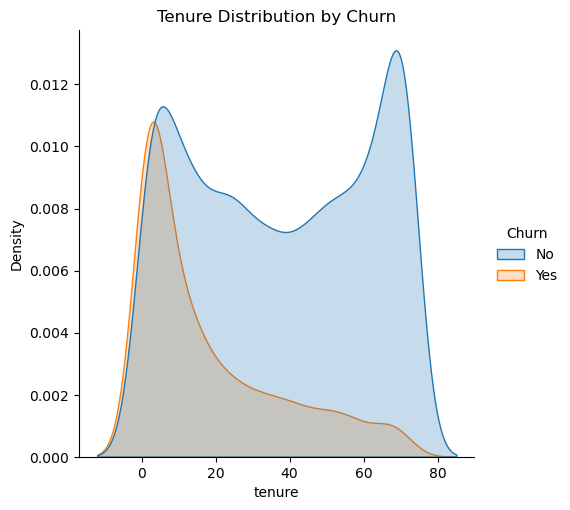

In [46]:
# Tenure Distribution by Churn
sns.displot(df, x="tenure", hue="Churn", kind="kde", fill=True)
plt.title("Tenure Distribution by Churn")
plt.show()

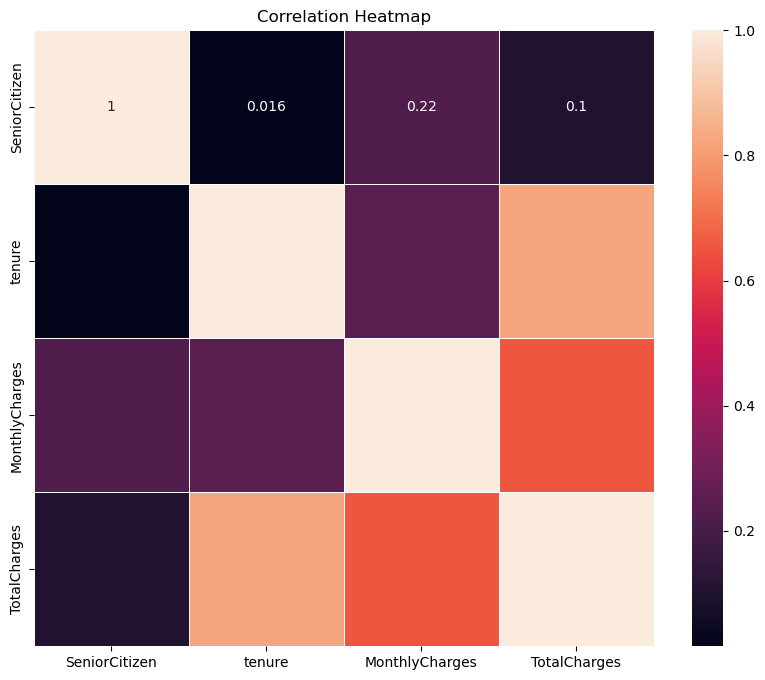

In [41]:

numeric_df = df.select_dtypes(include=np.number)

#correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


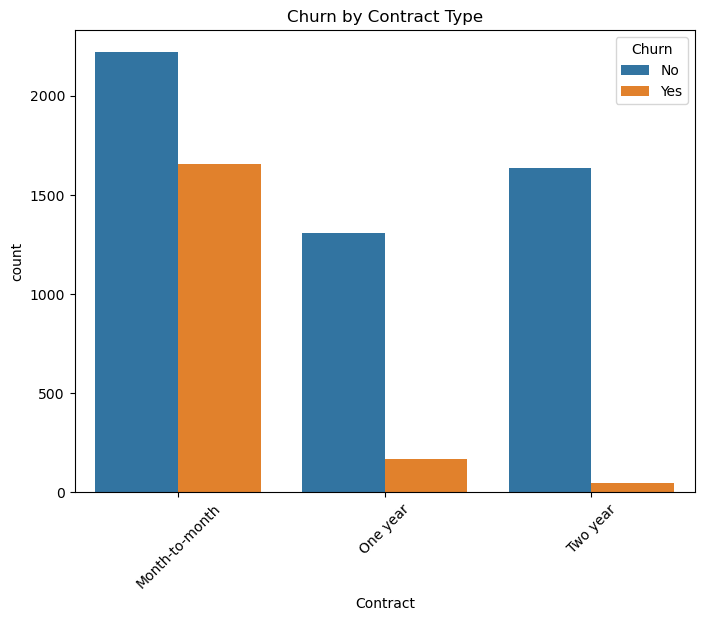

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

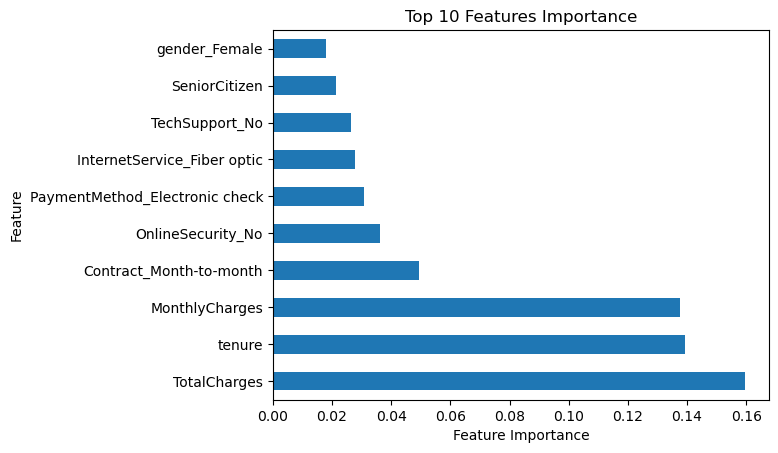

In [42]:
# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# Selecting top 10 features
top_features = feature_importances.nlargest(10)  
top_features.plot(kind='barh')
plt.title("Top 10 Features Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [43]:
#classification 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#classification algorithm (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)

#Evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

Accuracy: 0.7775408670931059
